<a href="https://colab.research.google.com/github/Katie0731/stats_DL/blob/main/chapter05_fundamentals-of-ml%20(%EA%B0%9C%EC%9D%B8%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# np.random.random((len(train_images), 784)) -> random noisy data 같은 개수만큼 추가
train_images_with_noise_channels.shape # 784 * 2 = 1568

(60000, 1568)

In [3]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the Model
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6050 - accuracy: 0.8145 - val_loss: 0.2925 - val_accuracy: 0.9081
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2454 - accuracy: 0.9244 - val_loss: 0.1952 - val_accuracy: 0.9409
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1605 - accuracy: 0.9497 - val_loss: 0.1372 - val_accuracy: 0.9609
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1137 - accuracy: 0.9631 - val_loss: 0.1252 - val_accuracy: 0.9631
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9746 - val_loss: 0.1246 - val_accuracy: 0.9650
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.1417 - val_accuracy: 0.9591
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.1747 - val_accuracy: 0.9534
Epoch 

#### 375값 어떻게 나오는지!
- [ 60000 / 128 (batch size) ] * [ 1 - 0.2(validation_split) ]

In [9]:
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2851 - accuracy: 0.9175 - val_loss: 0.1449 - val_accuracy: 0.9585
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1184 - accuracy: 0.9644 - val_loss: 0.1186 - val_accuracy: 0.9638
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.0931 - val_accuracy: 0.9744
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0554 - accuracy: 0.9841 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0416 - accuracy: 0.9881 - val_loss: 0.0930 - val_accuracy: 0.9732
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0301 - accuracy: 0.9918 - val_loss: 0.0833 - val_accuracy: 0.9773
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0812 - val_accuracy: 0.9781
Epoch 

**Plotting a validation accuracy comparison**

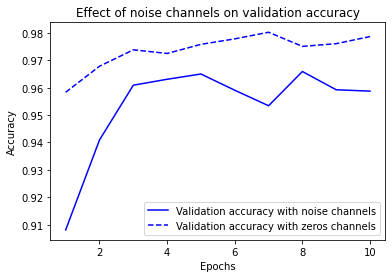

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

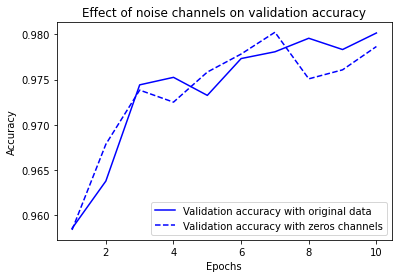

In [13]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# looks kind similar with original data

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3158 - accuracy: 0.1028 - val_loss: 2.3063 - val_accuracy: 0.1023
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3007 - accuracy: 0.1168 - val_loss: 2.3096 - val_accuracy: 0.1047
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2922 - accuracy: 0.1262 - val_loss: 2.3151 - val_accuracy: 0.1028
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2796 - accuracy: 0.1382 - val_loss: 2.3266 - val_accuracy: 0.1042
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2632 - accuracy: 0.1512 - val_loss: 2.3394 - val_accuracy: 0.1009
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2437 - accuracy: 0.1664 - val_loss: 2.3469 - val_accuracy: 0.1032
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2212 - accuracy: 0.1793 - val_loss: 2.3648 - val_accuracy: 0.0988

In [21]:
print(train_labels)
print(random_train_labels)
np.random.shuffle(random_train_labels)
print(random_train_labels) # np random shuffle이 바로 저장이 되는구나!

[3 0 3 ... 9 0 0]
[3 0 3 ... 9 0 0]
[5 4 7 ... 6 9 9]


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [22]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 1384.9194 - accuracy: 0.4385 - val_loss: 2.3629 - val_accuracy: 0.2620
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 4.7587 - accuracy: 0.3016 - val_loss: 2.1738 - val_accuracy: 0.2611
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 3.2358 - accuracy: 0.2643 - val_loss: 2.1560 - val_accuracy: 0.2492
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 3.1939 - accuracy: 0.2803 - val_loss: 2.4438 - val_accuracy: 0.2166
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8298 - accuracy: 0.2725 - val_loss: 2.1000 - val_accuracy: 0.2735
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 3.1352 - accuracy: 0.2578 - val_loss: 2.4611 - val_accuracy: 0.2765
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5650 - accuracy: 0.2940 - val_loss: 2.1885 - val_accuracy: 0.2147
Epo

**The same model with a more appropriate learning rate**

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

## 결과 앞보단 나음. 잘됨. 그래도 저 RMSprop이 너무너무 작으면 converge slowly라 안좋음

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3456 - accuracy: 0.9148 - val_loss: 0.1607 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1424 - accuracy: 0.9631 - val_loss: 0.1667 - val_accuracy: 0.9619
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1155 - accuracy: 0.9732 - val_loss: 0.1757 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0951 - accuracy: 0.9788 - val_loss: 0.2013 - val_accuracy: 0.9687
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.9817 - val_loss: 0.2181 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0780 - accuracy: 0.9844 - val_loss: 0.2608 - val_accuracy: 0.9679
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0758 - accuracy: 0.9864 - val_loss: 0.2456 - val_accuracy: 0.9737
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#우하향하는 그래프 나올거다. epoch 늘리는 게 좋은 건 아닌데..

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## overfit 문제는 있지만 loss도 줄고 좋아!

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# smaller 모델.. overfit 없지만 loss original보다 큰걸

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model with l2 regularization model")
plt.title("Effect of l2 regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# smaller 모델.. overfit 없지만 loss original보다 큰걸

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model with dropout regularization model")
plt.title("Effect of dropout regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary